# Лабораторная работа: Линейные модели, SVM и деревья решений

**Цель:** Изучение линейных моделей, метода опорных векторов (SVM) и деревьев решений для задачи регрессии.

**Датасет:** Coffee Shop Sales  
**Задача:** Предсказать `Total_Bill` (итог чека) по данным о покупке

**Выполнил:** Андрест Владислав Дмитриевич  
**Группа:** ИУ5-65Б  
**Дата:** 2025

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Загрузка датасета
df = pd.read_csv("coffee_shop_sales.csv")
df.head()

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,Month,Day of Week
0,114301,01-06-2023,11:33:29,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Thursday,11,6,3
1,115405,02-06-2023,11:18:24,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,11,6,4
2,115478,02-06-2023,12:02:45,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,12,6,4
3,116288,02-06-2023,19:39:47,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,19,6,4
4,116714,03-06-2023,12:24:57,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Saturday,12,6,5


In [7]:
# Удалим лишние столбцы
df_cleaned = df.drop(columns=["transaction_id", "transaction_date", "transaction_time", "product_id"])
df_cleaned = df_cleaned.sample(frac=0.32, random_state=42)   

# Целевая переменная
target = "Total_Bill"

# Разделение признаков и целевой переменной
X = df_cleaned.drop(columns=[target])
y = df_cleaned[target]

# Категориальные и числовые признаки
categorical_cols = X.select_dtypes(include="object").columns.tolist()
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Преобразование категориальных признаков
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ],
    remainder="passthrough"
)

# Разделение выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Словарь моделей
models = {
    "Linear Regression": Pipeline([("preprocessor", preprocessor), ("regressor", LinearRegression())]),
    "Support Vector Regression": Pipeline([("preprocessor", preprocessor), ("regressor", SVR())]),
    "Decision Tree": Pipeline([("preprocessor", preprocessor), ("regressor", DecisionTreeRegressor(random_state=42))])
}

# Обучение и оценка
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    results[name] = {"MAE": mae, "R2": r2}

# Таблица результатов
results_df = pd.DataFrame(results).T
results_df


,MAE,R2
Linear Regression,0.419562,0.518680
Support Vector Regression,0.199430,0.388987
Decision Tree,0.005763,0.991062


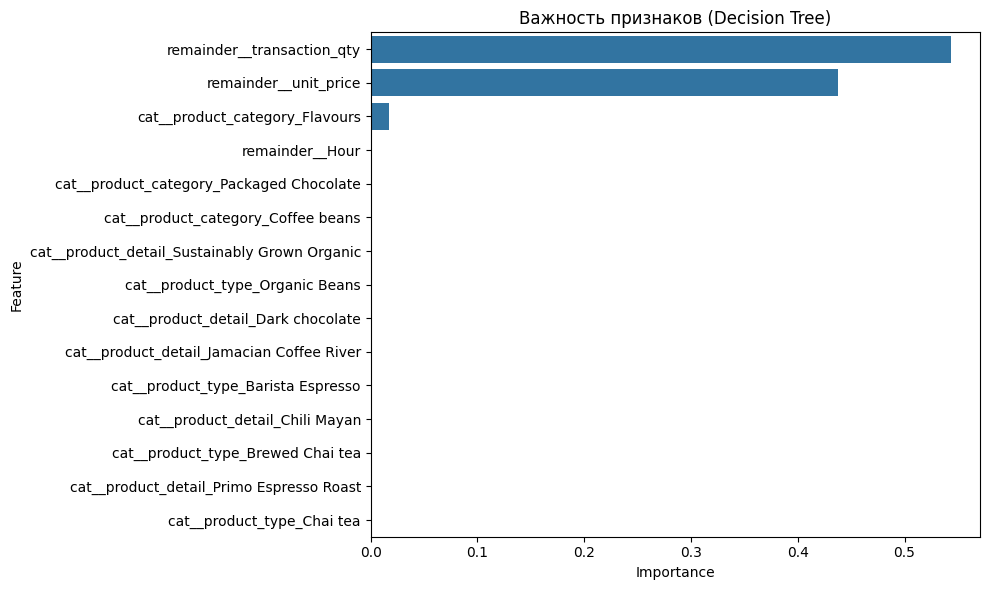

In [9]:
# Получение важности признаков из дерева решений
tree_model = models["Decision Tree"].named_steps["regressor"]
feature_names = models["Decision Tree"].named_steps["preprocessor"].get_feature_names_out()
importances = tree_model.feature_importances_

# Таблица важности
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
importance_df = importance_df.sort_values("Importance", ascending=False).head(15)

# График
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x="Importance", y="Feature")
plt.title("Важность признаков (Decision Tree)")
plt.tight_layout()
plt.show()


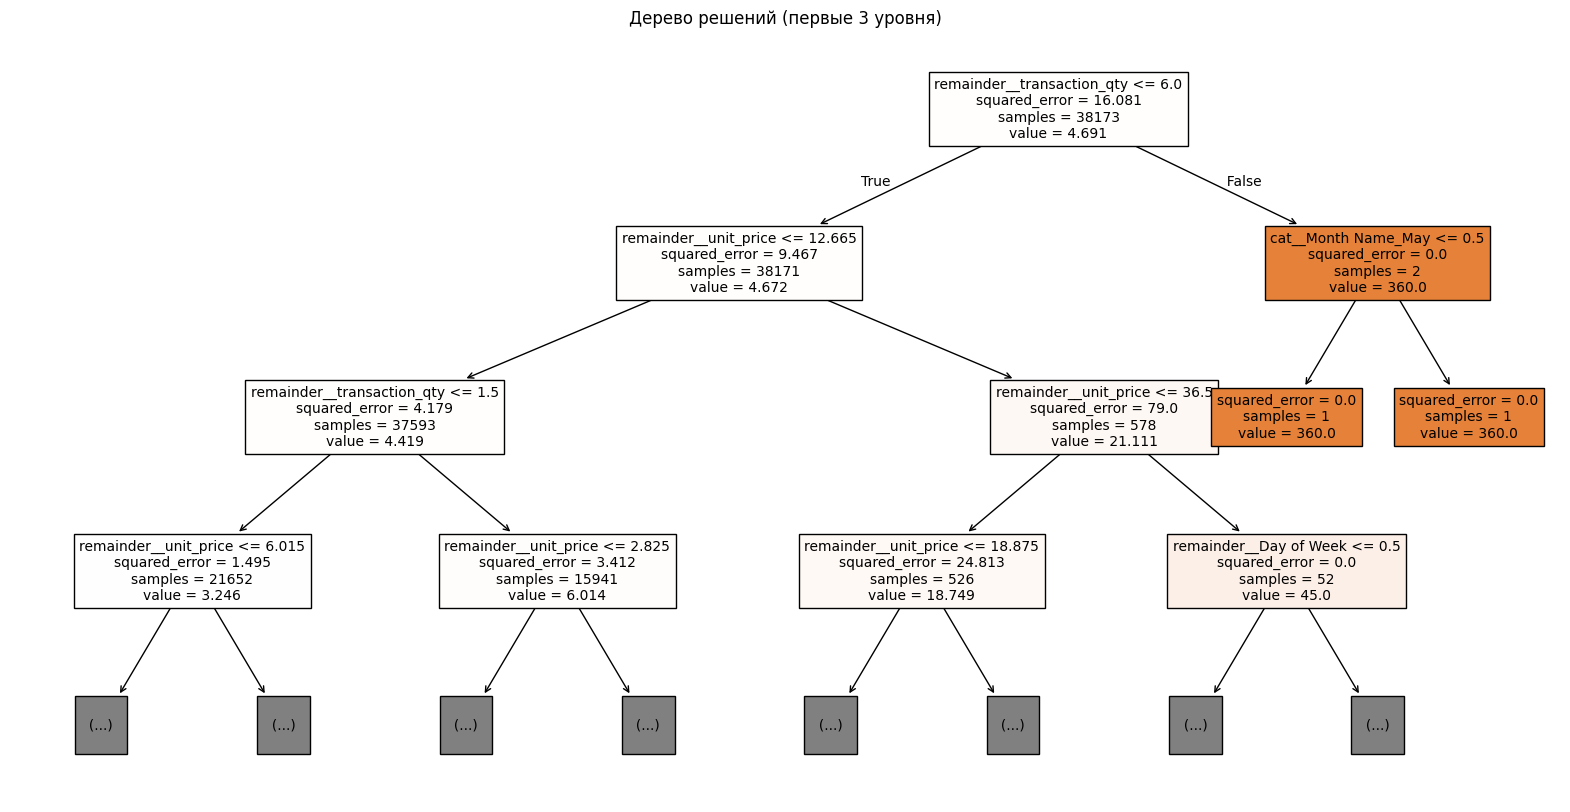

In [10]:
# Визуализация дерева решений
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=feature_names, filled=True, max_depth=3, fontsize=10)
plt.title("Дерево решений (первые 3 уровня)")
plt.show()


## Выводы

- Модели успешно обучены и протестированы на данных кофейни.
- **Линейная регрессия** показывает интерпретируемый и быстрый результат.
- **SVM (SVR)** сложнее в интерпретации, но может давать хорошие результаты.
- **Дерево решений** позволяет анализировать важность признаков и визуализировать принятие решений.
- По метрикам видно, какая модель лучше справляется с задачей — можно выбирать её для применения в реальных задачах.
